In [29]:
import numpy as np 
import pandas as pd
 

In [30]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings


In [32]:
df_churn=pd.read_csv('Churn_Modelling.csv')

In [33]:
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df_churn.drop(['RowNumber','Surname'], axis = 'columns', inplace =True)

In [35]:
col_obj = ['Geography', 'Gender']

In [36]:
for col in df_churn:
    if (col in col_obj):
        print(col,":",df_churn[col].unique())

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [37]:
df_churn['Gender'].replace(['Male', 'Female'],[1, 0], inplace= True)

In [38]:
df_churn = pd.get_dummies(data = df_churn, columns=['Geography'])
df_churn.columns

Index(['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [39]:
df_churn['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [40]:
df_churn_exited = df_churn[df_churn['Exited']==1]['Tenure']
df_churn_not_exited = df_churn[df_churn['Exited']==0]['Tenure']

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


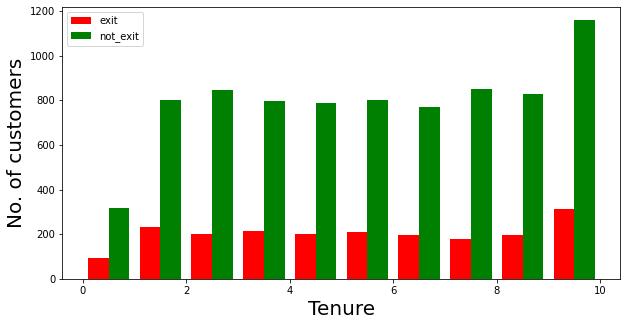

In [41]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()
visualization(df_churn_exited, df_churn_not_exited, "Tenure")

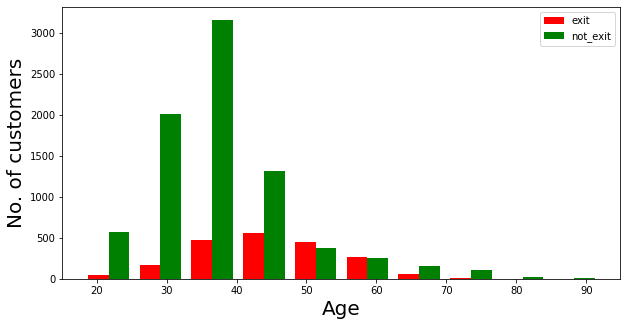

In [42]:
df_churn_exited2 = df_churn[df_churn['Exited']==1]['Age']
df_churn_not_exited2 = df_churn[df_churn['Exited']==0]['Age']
visualization(df_churn_exited2, df_churn_not_exited2, "Age")

In [45]:
cols_to_scale = ['CustomerId','CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_churn[cols_to_scale] = scaler.fit_transform(df_churn[cols_to_scale])
df_churn.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.275616,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.326454,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.214421,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.542636,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,0.688778,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [46]:
x = df_churn.drop('Exited', axis= 'columns')
y = df_churn['Exited']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state =1)

In [47]:
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,),activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4819 - accuracy: 0.7975
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7975
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.7997
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.8073
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8119
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8142
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8174
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8173
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8199
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4154 - accura

In [48]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.8660


[0.3333662748336792, 0.8659999966621399]

In [49]:
yp = model.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,yp))

ValueError: ignored

In [51]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.80      0.47      0.59       415

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



Text(69.0, 0.5, 'Truth')

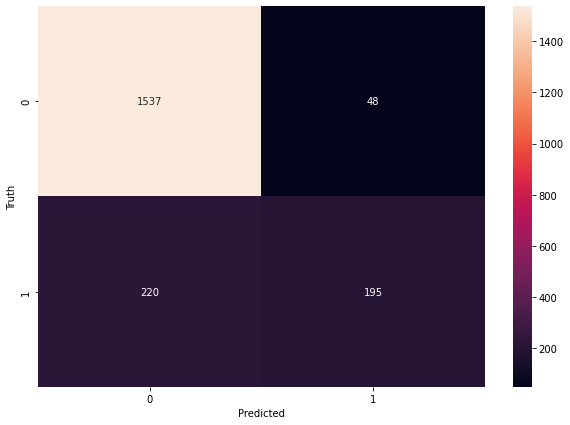

In [52]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
df_churn['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_sm, y_sm = sm.fit_resample(x, y)
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [55]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm,y_sm, test_size= 0.2, random_state =1, stratify = y_sm)
model_balanced = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,),activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_balanced.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_balanced.fit(x_train_sm, y_train_sm, epochs=100)

Epoch 1/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6607 - accuracy: 0.6077
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6040 - accuracy: 0.6801
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5636 - accuracy: 0.7145
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5128 - accuracy: 0.7523
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4839 - accuracy: 0.7699
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4738 - accuracy: 0.7768
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4692 - accuracy: 0.7794
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4663 - accuracy: 0.7790
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4638 - accuracy: 0.7777
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4619 - accura

In [56]:
model_balanced.evaluate(x_test_sm, y_test_sm)

100/100 [==============================] - 0s 1ms/step - loss: 0.4197 - accuracy: 0.8076


[0.4197118282318115, 0.8075957298278809]

In [57]:
yp = model_balanced.predict(x_test_sm)

In [58]:
y_pred = []
for element in yp:
    if (element > 0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)
print(classification_report(y_test_sm,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      1593
           1       0.84      0.77      0.80      1593

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



Text(69.0, 0.5, 'Truth')

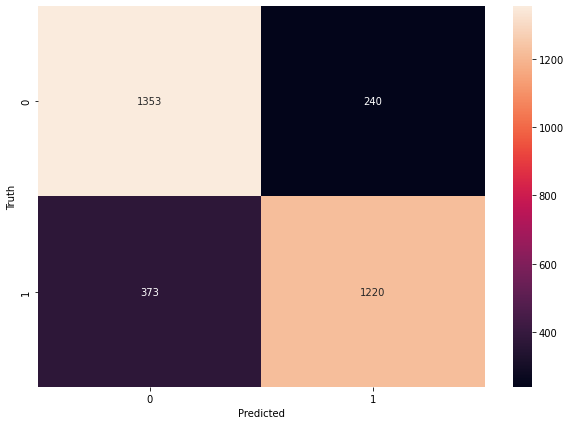

In [59]:
cm_bal = tf.math.confusion_matrix(labels=y_test_sm,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm_bal, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')